In [2]:
#Importar las librerias 
#Se importaron las siguientes librerías.
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [3]:
#Cargar el dataset "movies"
df = pd.read_csv("data_transf.csv")
df

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,title,vote_average,vote_count,id_coleccion,nombre_coleccion,id_produccion,nombre_produccion,release_year,return,genres_name,actores,director
0,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,10194.0,Toy Story Collection,3.0,Pixar Animation Studios,1995,12.451801,"Animation, Comedy, Family","['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",John Lasseter
1,65000000.0,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,NaN,NaN,559.0,TriStar Pictures,1995,4.043035,"Adventure, Fantasy, Family","['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",Joe Johnston
2,0.0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,119050.0,Grumpy Old Men Collection,6194.0,Warner Bros.,1995,0.000000,"Romance, Comedy","['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...",Howard Deutch
3,16000000.0,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,NaN,NaN,306.0,Twentieth Century Fox Film Corporation,1995,5.090760,"Comedy, Drama, Romance","['Whitney Houston', 'Angela Bassett', 'Loretta...",Forest Whitaker
4,0.0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0,96871.0,Father of the Bride Collection,5842.0,Sandollar Productions,1995,0.000000,Comedy,"['Steve Martin', 'Diane Keaton', 'Martin Short...",Charles Shyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37321,0.0,30840,en,"Yet another version of the classic epic, with ...",5.683753,1991-05-13,0.0,104.0,Robin Hood,5.7,26.0,NaN,NaN,7025.0,Westdeutscher Rundfunk (WDR),1991,0.000000,"Drama, Action, Romance","['Patrick Bergin', 'Uma Thurman', 'David Morri...",John Irvin
37322,0.0,111109,tl,An artist struggles to finish his work while a...,0.178241,2011-11-17,0.0,360.0,Century of Birthing,9.0,3.0,NaN,NaN,19653.0,Sine Olivia,2011,0.000000,Drama,"['Angel Aquino', 'Perry Dizon', 'Hazel Orencio...",Lav Diaz
37323,0.0,67758,en,"When one of her hits goes wrong, a professiona...",0.903007,2003-08-01,0.0,90.0,Betrayal,3.8,6.0,NaN,NaN,6165.0,American World Pictures,2003,0.000000,"Action, Drama, Thriller","['Erika Eleniak', 'Adam Baldwin', 'Julie du Pa...",Mark L. Lester
37324,0.0,227506,en,"In a small town live two brothers, one a minis...",0.003503,1917-10-21,0.0,87.0,Satan Triumphant,0.0,0.0,NaN,NaN,88753.0,Yermoliev,1917,0.000000,NaN,"['Iwan Mosschuchin', 'Nathalie Lissenko', 'Pav...",Yakov Protazanov


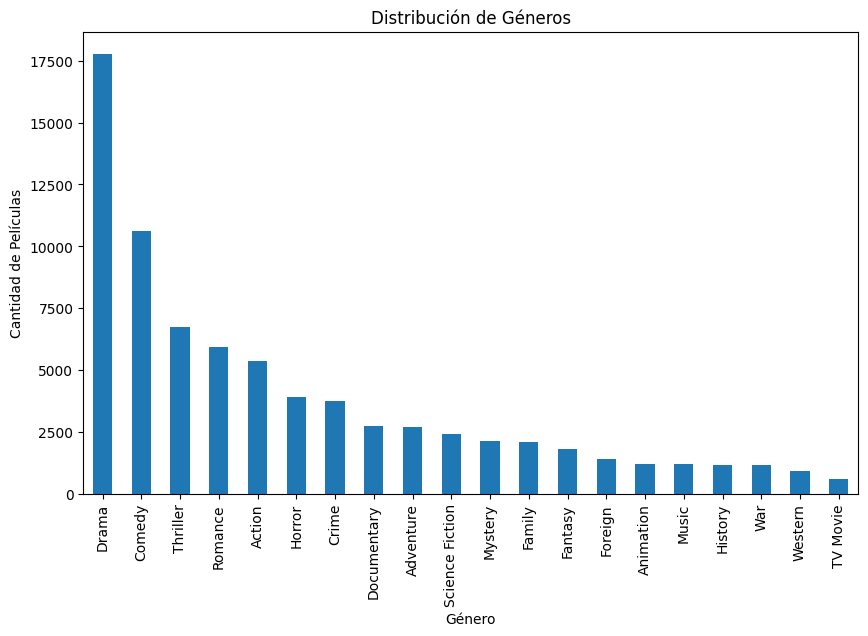

In [4]:
#Distribución de Géneros de Películas Se visualizó la distribución de géneros de películas mediante un gráfico de barras.
genre_counts = df['genres_name'].str.split(', ').explode().value_counts()
genre_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Género')
plt.ylabel('Cantidad de Películas')
plt.title('Distribución de Géneros')
plt.show()

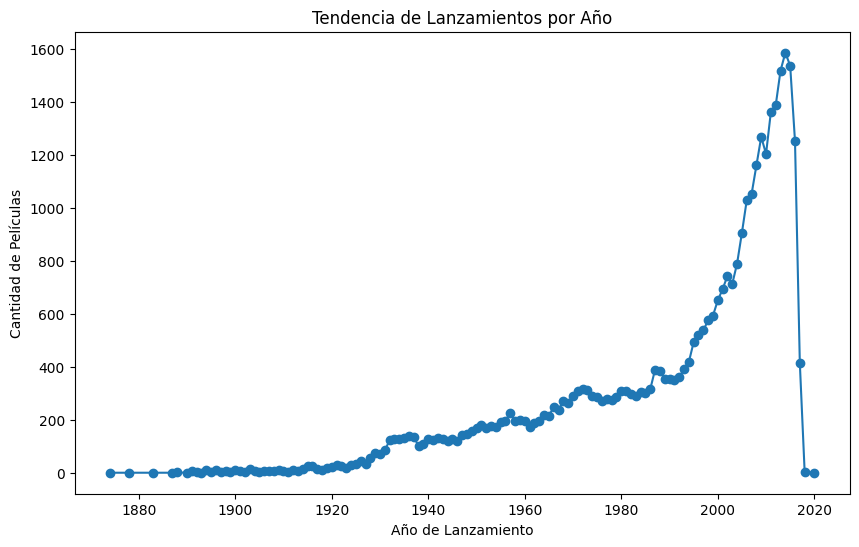

In [5]:
#e representó la cantidad de películas lanzadas por año en un gráfico de líneas
df['release_year'] = pd.to_datetime(df['release_date']).dt.year
year_counts = df['release_year'].value_counts().sort_index()
year_counts.plot(kind='line', marker='o', figsize=(10, 6))
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Películas')
plt.title('Tendencia de Lanzamientos por Año')
plt.show()


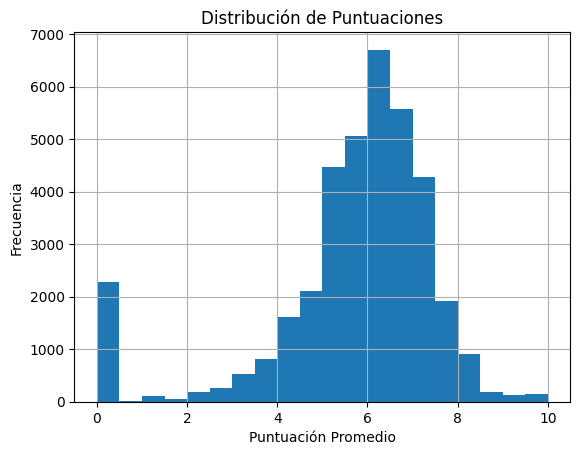

In [6]:
#Se creó un histograma para mostrar la distribución de las puntuaciones promedio.
df['vote_average'].hist(bins=20)
plt.xlabel('Puntuación Promedio')
plt.ylabel('Frecuencia')
plt.title('Distribución de Puntuaciones')
plt.show()

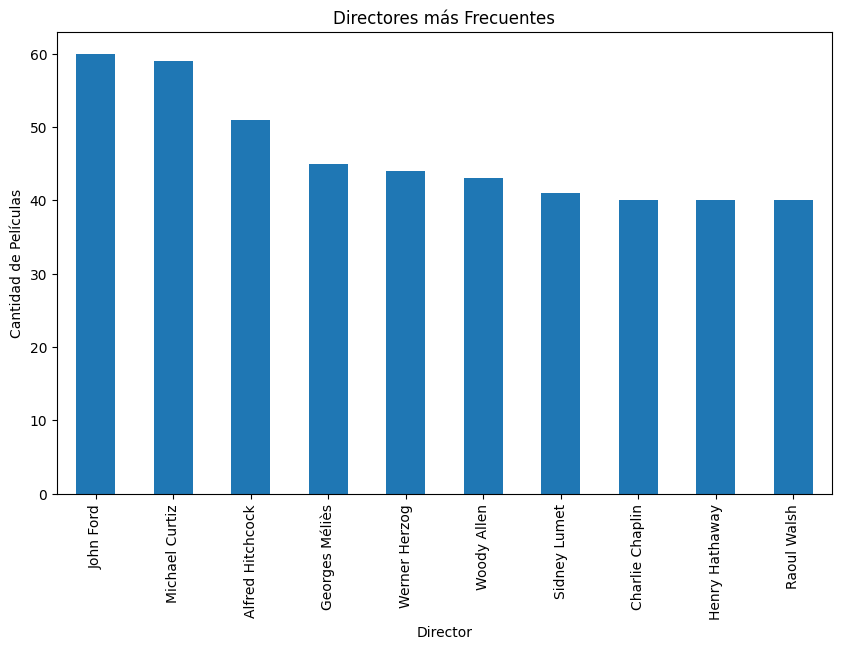

In [7]:
#Se identificaron los directores más involucrados en las películas
director_counts = df['director'].value_counts()
director_counts[:10].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Director')
plt.ylabel('Cantidad de Películas')
plt.title('Directores más Frecuentes')
plt.show()

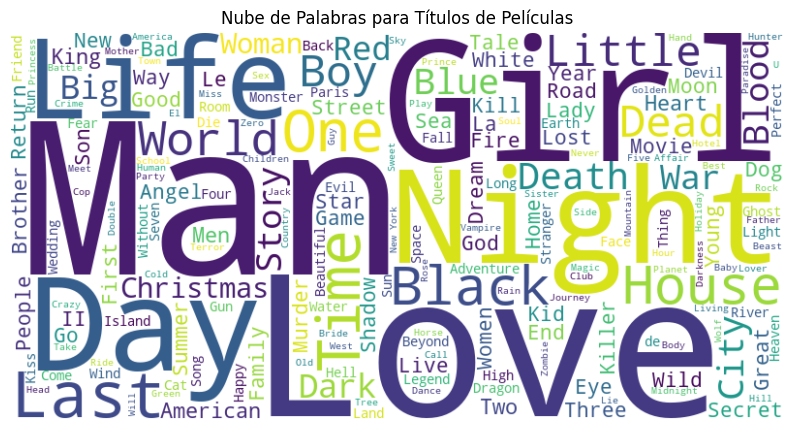

In [8]:
#Se generó una nube de palabras a partir de los títulos de las películas.
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['title']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras para Títulos de Películas')
plt.show()